Select a radius of your own choice in the frequency domain:
1. Display the image.
2. Perform the Cosine Transform & display it.
3. Pick a radius value & delete all frequency components outside of the radius display it.
4. Compute the inverse transform & display it.
5. Please comment on the results.
6. Delete all frequency components inside the radius & display it.
7. Compute the inverse transform & display it.
8. Please comment on the results.
9. Give a general short discussion on what you learned from this question.

In [60]:
!pip install opencv-python

In [61]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from scipy.fftpack import dct, idct
from skimage.color import rgb2gray
from skimage.io import imread
from scipy.fft import fft2, fftshift, ifft2, ifftshift

In [62]:
image = cv2.imread('/content/lungs.jpg', cv2.IMREAD_GRAYSCALE)

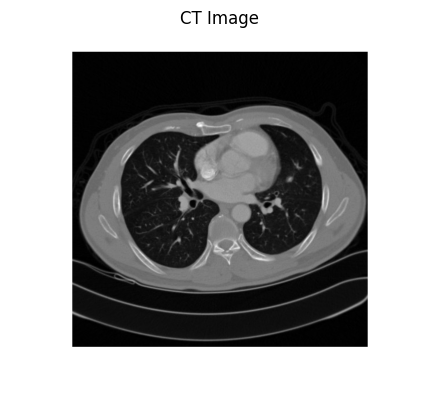

In [63]:
plt.imshow(image, cmap='gray')
plt.title('CT Image')
plt.axis('off')
plt.show()

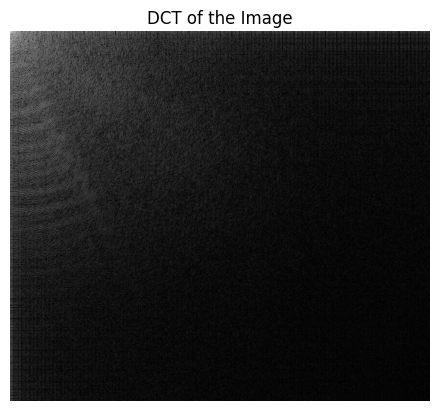

In [64]:
# Perform the 2D Discrete Cosine Transform (DCT) on the image
cosine_transform_image = dct(dct(image.T, norm='ortho').T, norm='ortho')

# Display the DCT of the image
plt.imshow(np.log(np.abs(cosine_transform_image)+1), cmap='gray')
plt.title('DCT of the Image')
plt.axis('off')
plt.show()

In [97]:
def remove_outer_frequency_radius(radius,img,i):
  mask = np.zeros_like(img)
  center = tuple(np.array(mask.shape) // 2)
  cv2.circle(mask, center, radius, (1, 1, 1), thickness=-1)

  filtered_dct_img = img * mask

  p1=[-1,1,3,5,7,9]
  plt.figure(figsize=(12, 18))
  plt.subplot(5,2,p1[i])
  plt.imshow(np.log(np.abs(filtered_dct_img) + 1), cmap='gray')
  plt.title(f'DCT with Frequencies Outside Radius {radius} Removed')
  plt.axis('off')

  idct_image = idct(idct(filtered_dct_img.T, norm='ortho').T, norm='ortho')

  p2=[-1,2,4,6,8,10]
  plt.subplot(5,2,p2[i])
  plt.imshow(idct_image, cmap='gray')
  plt.title('Reconstructed Image with Frequencies Removed')
  plt.axis('off')
  plt.show()


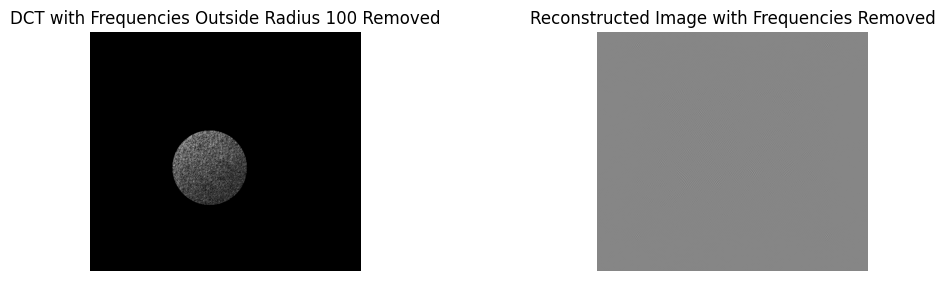

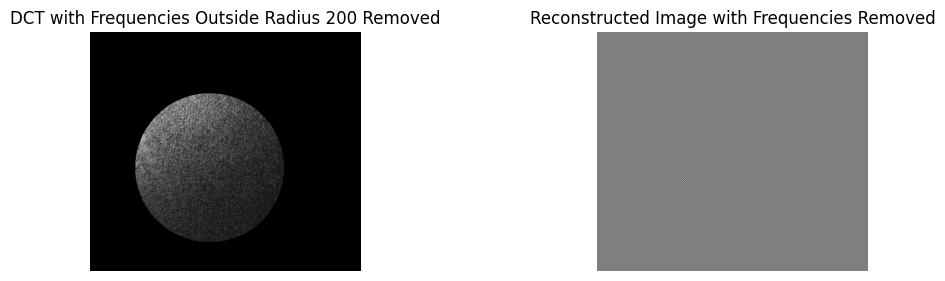

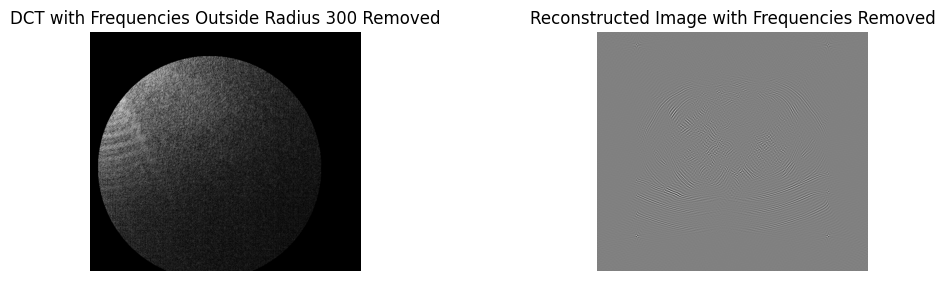

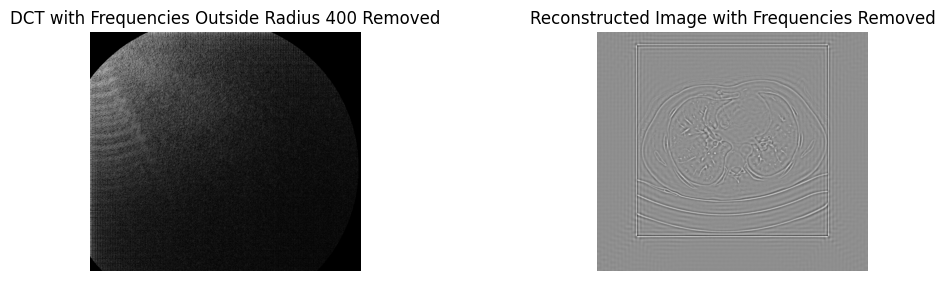

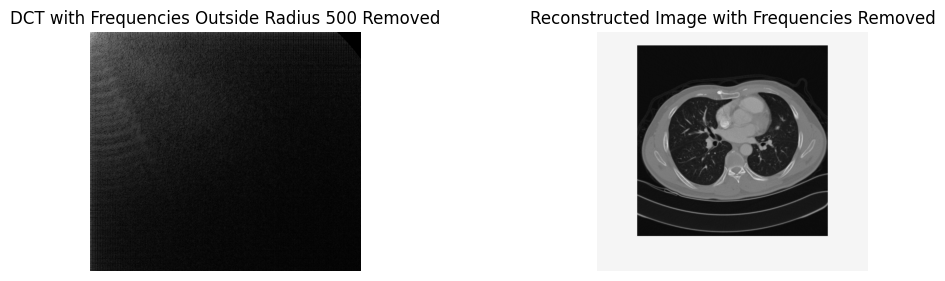

In [98]:
for i in range(1,6):
  remove_outer_frequency_radius(100*i,cosine_transform_image,i)

In [114]:
def remove_inner_frequency_radius(radius,img,i):
  mask = np.ones_like(img)
  center = tuple(np.array(mask.shape) // 3)
  cv2.circle(mask, center, radius, (0, 0, 0), thickness=-1)

  filtered_dct_img = img * mask

  p1=[-1,1,3,5,7,9]
  plt.figure(figsize=(12, 18))
  plt.subplot(5,2,p1[i])
  plt.imshow(np.log(np.abs(filtered_dct_img) + 1), cmap='gray')
  plt.title(f'DCT with Frequencies Inside Radius {radius} Removed')
  plt.axis('off')

  idct_image = idct(idct(filtered_dct_img.T, norm='ortho').T, norm='ortho')

  p2=[-1,2,4,6,8,10]
  plt.subplot(5,2,p2[i])
  plt.imshow(idct_image, cmap='gray')
  plt.title('Reconstructed Image with Frequencies Removed')
  plt.axis('off')
  plt.show()


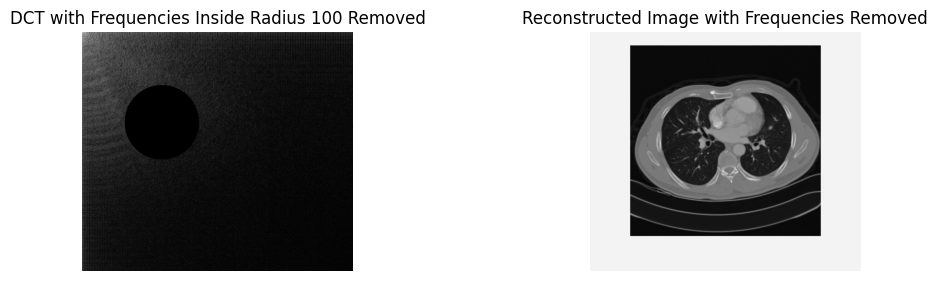

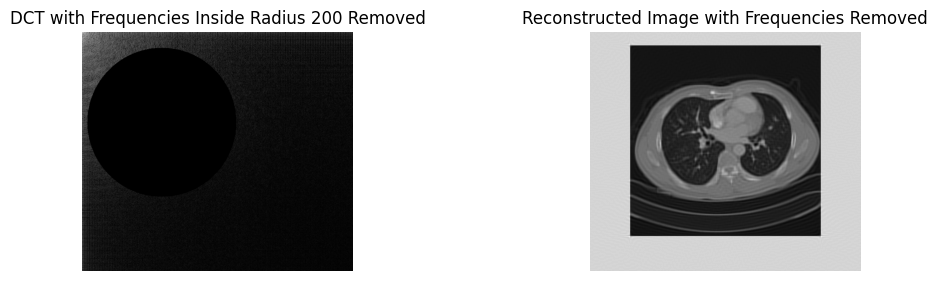

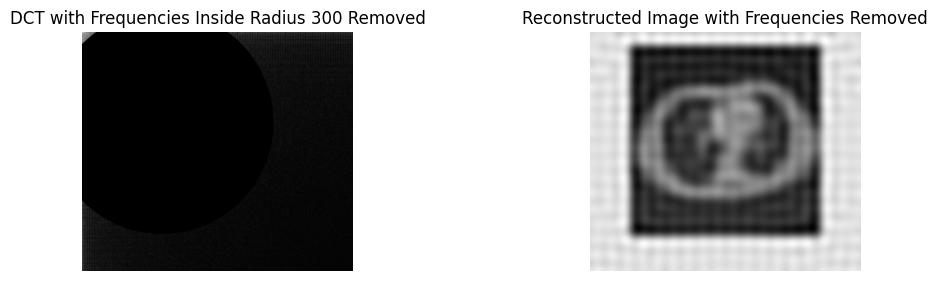

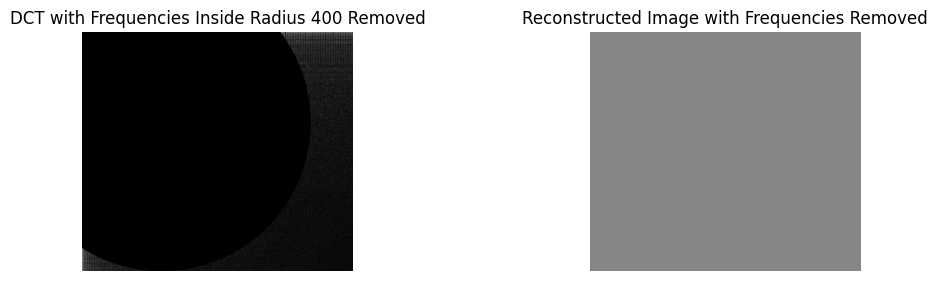

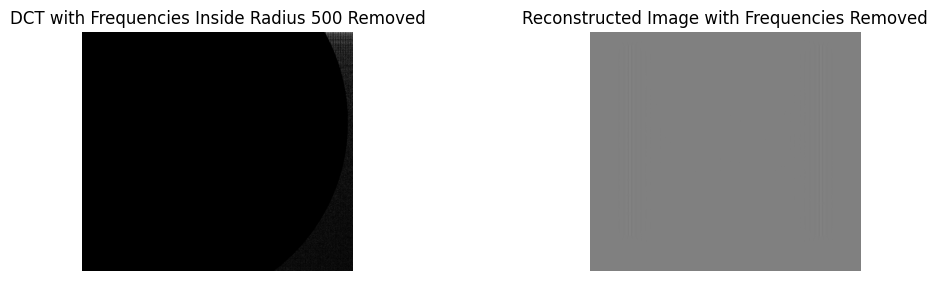

In [115]:
for i in range(1,6):
  remove_inner_frequency_radius(100*i,cosine_transform_image,i)

Extract the DICOM header. List all the Tag Names and the associated Tag Data (eg, Patient Name: John Doe, etc.) <br>
For the DICOM header, you should list all components and corresponding data.<BR>
[filename] [xxxx]<BR>
[filedate] [xx/xx/xxxx]

In [116]:
!pip install pydicom

In [117]:
import pydicom

In [118]:
dicom_file = pydicom.dcmread('/content/image16.dcm')

for element in dicom_file:
    print('[',element.description(),'] :', '[',element.value,']')


[ Image Type ] : [ ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'] ]
[ SOP Class UID ] : [ 1.2.840.10008.5.1.4.1.1.2 ]
[ SOP Instance UID ] : [ 1.3.6.1.4.1.9590.100.1.1.218664440213845548401456810263383085997 ]
[ Study Date ] : [ 20050325 ]
[ Series Date ] : [ 20050325 ]
[ Acquisition Date ] : [ 20050325 ]
[ Content Date ] : [ 20050325 ]
[ Study Time ] : [ 100547.500000 ]
[ Series Time ] : [ 100919.234000 ]
[ Acquisition Time ] : [ 101059.577017 ]
[ Content Time ] : [ 101059.577017 ]
[ Accession Number ] : [ 24365 ]
[ Modality ] : [ CT ]
[ Manufacturer ] : [ SIEMENS ]
[ Institution Name ] : [ USC RADIOLOGY ASSOCIATES, INC. ]
[ Institution Address ] : [ San Pablo
Los Angeles/E8D954/
Los Angeles
USA ]
[ Referring Physician's Name ] : [ DEARTOLA^IGNACIO ]
[ Station Name ] : [ HCC2CTNAV1 ]
[ Study Description ] : [ CT CHEST, WITH CONTRAST ]
[ Series Description ] : [ ThorRoutine ST 3.0  B41f ]
[ Physician(s) of Record ] : [ DEARTOLA^IGNACIO ]
[ Name of Physician(s) Reading Study ] : [  ]
[